# XGBoost

In [52]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

In [123]:
n = 3000

X = np.linspace(0,1000, n)
y = np.sin(X/2) + np.random.normal(0,0.3, n)
X = np.cos(X)

# Train/val/test split
train_rows = int(len(X)*0.7)
val_rows = train_rows + int(len(X)*0.2)

X_train = X[:train_rows].reshape((-1,1))
X_val = X[train_rows:val_rows].reshape((-1,1))
X_test = X[val_rows:].reshape((-1,1))

y_train = y[:train_rows]
y_val = y[train_rows:val_rows]
y_test = y[val_rows:]

y_train = (y_train - np.min(y_train))/(np.max(y_train) - np.min(y_train))
y_val = (y_val - np.min(y_train))/(np.max(y_train) - np.min(y_train))
y_test = (y_test - np.min(y_train))/(np.max(y_train) - np.min(y_train))

In [110]:
xg_reg = xgb.XGBRegressor()

In [128]:
X_noise = np.array(X_train) + np.random.normal(0,0.4,(len(X_train),1))

xg_reg.fit(X_noise,X_train)

preds = xg_reg.predict(X_val)

[20:42:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


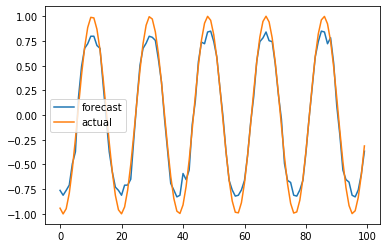

In [129]:
plt.plot(preds[:100], label = "forecast")
plt.plot(X_val[:100], label = "actual")
plt.legend()